In [1]:
import itertools
import math

from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, confusion_matrix, roc_curve, accuracy_score
from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm

C:\Anaconda\envs\py35\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
data = pd.read_csv("2018 Case Study Data Set/credit/data.csv")

<p>1. Develop models to predict th ecustomers' probability of default and outline the methodlogy used. It could include (but not limited to) the following:
- Feature engineering and selection

<p>2. Perform model validation

In [3]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


<li>X1: Amount of the given credit : it includes both the individual consumer credit and his/her family (supplementary) credit. 
<li>X2: Gender (1 = male; 2 = female). 
<li>X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
<li>X4: Marital status (1 = married; 2 = single; 3 = others). 
<li>X5: Age (year). 
<li>X6 - X11: History of past payment. Past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
<li>X12-X17: Amount of bill statement. X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
<li>X18-X23: Amount of previous payment. X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 
<li>Y = default (Yes = 1, No = 0)


In [4]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


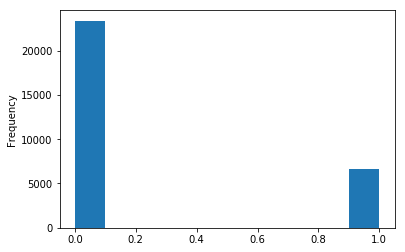

In [5]:
data['Y'].plot.hist()

In [6]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [7]:
missing_values_table(data)

Your selected dataframe has 24 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [8]:
data.dtypes.value_counts()

int64    24
dtype: int64

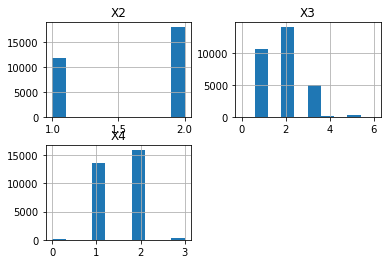

In [9]:
data[data.columns[1:4]].hist()
plt.show()

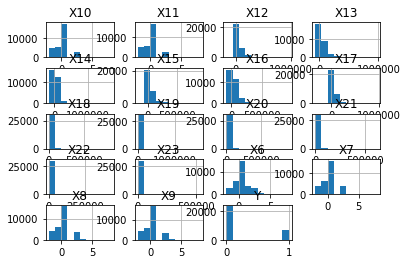

In [10]:
data[data.columns[5:]].hist()
plt.show()

looking at the target variable Y, we have an unbalanced class size and will need to take that into account when building the model

In [11]:
correlations = data.corr()['Y'].sort_values()

print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 X12   -0.019644
X13   -0.014193
X14   -0.014076
X15   -0.010156
X16   -0.006760
X17   -0.005372
X5     0.013890
X3     0.028006
X11    0.186866
X10    0.204149
X9     0.216614
X8     0.235253
X7     0.263551
X6     0.324794
Y      1.000000
Name: Y, dtype: float64

Most Negative Correlations:
 X1    -0.153520
X18   -0.072929
X19   -0.058579
X21   -0.056827
X20   -0.056250
X22   -0.055124
X23   -0.053183
X2    -0.039961
X4    -0.024339
X12   -0.019644
X13   -0.014193
X14   -0.014076
X15   -0.010156
X16   -0.006760
X17   -0.005372
Name: Y, dtype: float64


x1

Split data in testing and training set

In [12]:
ix = [i for i in data.index.values]

In [13]:
np.random.shuffle(ix)
test_set = np.random.choice(ix, math.floor(len(ix)*0.3), replace=False)

In [14]:
train_set = [i for i in ix if i not in test_set]

Make baseline model, no feature selection

First, let's balance the dataset by upsampling the minority class

In [15]:
smote = SMOTE(random_state=4, ratio=1.0)

Now let's do some data cleaning by converting categorical variables into binar variables, and regularizing the data

Convert X2 (gender), X3 (education) and X4 (marital status) into binary variables

In [16]:
data = data.join(pd.get_dummies(data['X2']).add_prefix("X2_gender_"))

In [17]:
data = data.join(pd.get_dummies(data['X3']).add_prefix("X3_edu_"))

In [18]:
data = data.join(pd.get_dummies(data['X4']).add_prefix("X4_mstatus_"))

Now regularize the large values

In [19]:
data['X1_reg'] = (data['X1'] - data['X1'].mean())/(data['X1'].max() - data['X1'].min())

In [20]:
data['X5_reg'] = (data['X5'] - data['X5'].mean())/(data['X5'].max() - data['X5'].min())

In [21]:
for x in np.arange(6,24):
    data['X'+ str(x) + '_reg'] = (data['X' + str(x)] - data['X' + str(x)].mean())/(data['X' + str(x)].max() - data['X' + str(x)].min())

In [22]:
data.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y', 'X2_gender_1', 'X2_gender_2', 'X3_edu_0', 'X3_edu_1',
       'X3_edu_2', 'X3_edu_3', 'X3_edu_4', 'X3_edu_5', 'X3_edu_6',
       'X4_mstatus_0', 'X4_mstatus_1', 'X4_mstatus_2', 'X4_mstatus_3',
       'X1_reg', 'X5_reg', 'X6_reg', 'X7_reg', 'X8_reg', 'X9_reg', 'X10_reg',
       'X11_reg', 'X12_reg', 'X13_reg', 'X14_reg', 'X15_reg', 'X16_reg',
       'X17_reg', 'X18_reg', 'X19_reg', 'X20_reg', 'X21_reg', 'X22_reg',
       'X23_reg'],
      dtype='object')

Lets create a new feature called "cluster"

In [23]:
new_feat = ['Y', 'X2_gender_1', 'X2_gender_2', 'X3_edu_0', 'X3_edu_1',
       'X3_edu_2', 'X3_edu_3', 'X3_edu_4', 'X3_edu_5', 'X3_edu_6',
       'X4_mstatus_0', 'X4_mstatus_1', 'X4_mstatus_2', 'X4_mstatus_3',
       'X1_reg', 'X5_reg', 'X6_reg', 'X7_reg', 'X8_reg', 'X9_reg', 'X10_reg',
       'X11_reg', 'X12_reg', 'X13_reg', 'X14_reg', 'X15_reg', 'X16_reg',
       'X17_reg', 'X18_reg', 'X19_reg', 'X20_reg', 'X21_reg', 'X22_reg',
       'X23_reg']

In [24]:
X_train = data[new_feat[1:]].loc[train_set].values
y_train = data[new_feat[0]].loc[train_set].values

X_test = data[new_feat[1:]].loc[test_set].values
y_test = data[new_feat[0]].loc[test_set].values

x_samp, y_samp = smote.fit_sample(X_train, y_train)

C:\Anaconda\envs\py35\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [25]:
lr = LogisticRegression(fit_intercept=True, C=1e9)
lr.fit(x_samp, y_samp)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

This is now our baseline logistic regression model

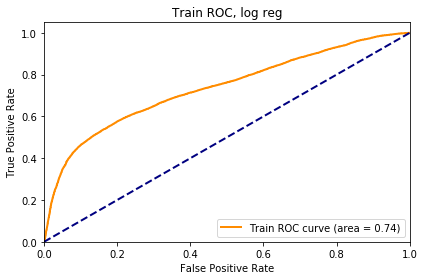

In [26]:
y_score = lr.predict_proba(x_samp)

fpr, tpr, thresholds = roc_curve(y_samp, y_score[:, 1])
roc_auc = auc(fpr, tpr)

fig = plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
       lw=lw, label='Train ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train ROC, log reg')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

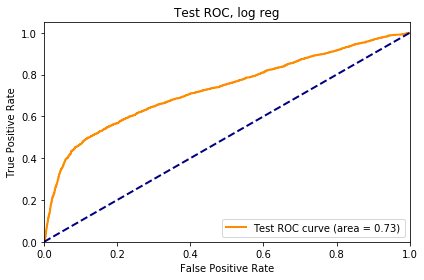

In [27]:
y_score = lr.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

fig = plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
       lw=lw, label='Test ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC, log reg')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

train and test ROC are pretty similar indicating that we haven't gotten too much overfitting

In [28]:
est = sm.Logit(y_samp, x_samp)
est2 = est.fit()
print(est2.summary())

         Current function value: 0.603734
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                32854
Model:                          Logit   Df Residuals:                    32823
Method:                           MLE   Df Model:                           30
Date:                Sun, 24 Feb 2019   Pseudo R-squ.:                  0.1290
Time:                        21:47:08   Log-Likelihood:                -19835.
converged:                      False   LL-Null:                       -22773.
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.0201        nan        nan        nan         nan         nan
x2            -2.1400        nan        nan        nan         na

C:\Anaconda\envs\py35\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda\envs\py35\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Anaconda\envs\py35\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Anaconda\envs\py35\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Anaconda\envs\py35\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [29]:
lr.coef_

array([[-4.83338515e-01, -6.03285024e-01, -5.46296014e+00,
         1.36351966e+00,  1.30711723e+00,  1.21942329e+00,
        -2.81827283e-01, -1.16358761e-01,  8.84462470e-01,
        -1.57605401e+00,  2.29749165e-01,  6.43011015e-03,
         2.53251194e-01, -1.03542304e+00,  3.46356656e-01,
         5.25324889e+00,  8.13784280e-01,  6.78009598e-01,
         1.64043526e-01,  7.97458875e-02, -3.82041841e-01,
        -7.06727388e+00,  7.12115054e-01,  6.41288799e+00,
        -1.57773889e+00,  3.11524278e+00,  9.79481572e-01,
        -1.30774360e+01, -2.53815207e+01, -4.33021951e+00,
        -4.93095221e+00, -2.15321151e+00, -3.26605764e+00]])

Now let's try to do better than this baseline by doing some feature engineering and feature selection

We can incorporate some new features into our model by trying to summarize the existing data features through unsupervised learning techniques

In [30]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(data[new_feat[1:]])

In [36]:
data['kmeans_clusters'] = kmeans.predict(data[new_feat[1:]])

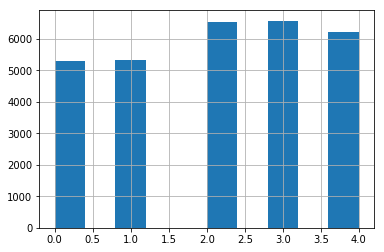

In [37]:
data['kmeans_clusters'].hist()

In [32]:
features = new_feat.copy()

In [33]:
features.append('kmeans_clusters')

In [34]:
corr_coef =[]

for f in features[1:]:
    corr_coef.append(np.abs(np.corrcoef(data['Y'], data[f])[0][1]))

In [35]:
corr_df = pd.DataFrame([features[1:], corr_coef]).T
corr_df.columns = ['feat_name', 'corr_coef']

In [36]:
corr_df.sort_values('corr_coef', ascending=False)

,feat_name,corr_coef
15,X6_reg,0.324794
16,X7_reg,0.263551
17,X8_reg,0.235253
18,X9_reg,0.216614
19,X10_reg,0.204149
20,X11_reg,0.186866
13,X1_reg,0.15352
27,X18_reg,0.0729295
28,X19_reg,0.0585787
30,X21_reg,0.0568274


In [37]:
selected_feats = corr_df.sort_values('corr_coef', ascending=False).head(20)['feat_name'].values

In [61]:
X_train = data[selected_feats].loc[train_set].values
y_train = data['Y'].loc[train_set].values

X_test = data[selected_feats].loc[test_set].values
y_test = data['Y'].loc[test_set].values


In [64]:
lr.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

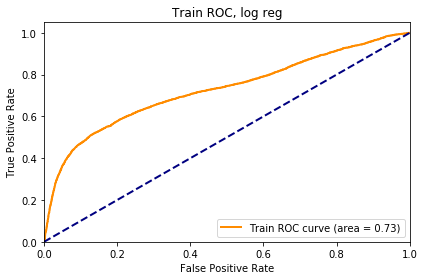

In [65]:
y_score = lr.predict_proba(X_train)

fpr, tpr, thresholds = roc_curve(y_train, y_score[:, 1])
roc_auc = auc(fpr, tpr)

fig = plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
       lw=lw, label='Train ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train ROC, log reg')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

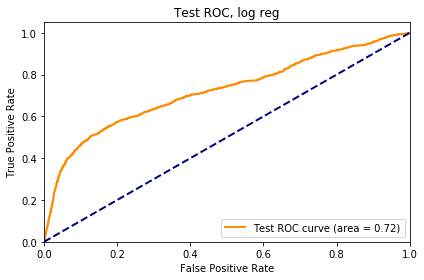

In [66]:
y_score = lr.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

fig = plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
       lw=lw, label='Test ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC, log reg')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

Let's try tree-based feature selection

In [68]:
clf = ExtraTreesClassifier()
clf = clf.fit(X_train, y_train)

In [69]:
clf.feature_importances_

array([5.10645523e-03, 4.89701874e-03, 5.99290136e-05, 4.37526936e-03,
       8.29737926e-03, 7.90164501e-03, 4.54267279e-04, 1.32272879e-03,
       5.06335802e-04, 4.87817760e-04, 5.00016484e-03, 4.34807609e-03,
       2.03580865e-03, 6.45295183e-02, 6.61305347e-02, 1.02367967e-01,
       3.40325310e-02, 4.96572905e-02, 2.75435875e-02, 3.51229807e-02,
       3.13072365e-02, 4.96286181e-02, 4.65634838e-02, 4.60600027e-02,
       4.38115481e-02, 4.42845723e-02, 4.50682891e-02, 4.59786980e-02,
       4.27476921e-02, 4.25484604e-02, 4.10938345e-02, 4.26250406e-02,
       4.62264658e-02, 7.87875231e-03])

In [70]:
feature_importance = pd.DataFrame([np.array(features[1:]), clf.feature_importances_]).T
feature_importance.columns = ['feat_name', 'clf_feat_importance']

In [71]:
feature_importance.sort_values('clf_feat_importance',ascending=False)

,feat_name,clf_feat_importance
15,X6_reg,0.102368
14,X5_reg,0.0661305
13,X1_reg,0.0645295
17,X8_reg,0.0496573
21,X12_reg,0.0496286
22,X13_reg,0.0465635
32,X23_reg,0.0462265
23,X14_reg,0.04606
27,X18_reg,0.0459787
26,X17_reg,0.0450683


In [72]:
feature_importance['clf_feat_importance'].mean()

0.029411764705882353

In [74]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X_train)
X_new_test = model.transform(X_test)

In [75]:
X_new.shape

(21000, 19)

In [77]:
lr.fit(X_new, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [78]:
y_score = lr.predict_proba(X_new)

fpr, tpr, thresholds = roc_curve(y_samp, y_score[:, 1])
roc_auc = auc(fpr, tpr)

fig = plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
       lw=lw, label='Train ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC, log reg')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [32578, 21000]

In [56]:
y_score = lr.predict_proba(X_new_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

fig = plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
       lw=lw, label='Train ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC, log reg')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

NameError: name 'X_new_test' is not defined

Now let's try a different model to see if we can get better results

In [57]:
rnforest = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10, min_samples_split=20)

In [58]:
rnforest = rnforest.fit(X_new, y_samp)

NameError: name 'X_new' is not defined

In [59]:
y_score = rnforest.predict_proba(X_new)

fpr, tpr, thresholds = roc_curve(y_samp, y_score[:, 1])
roc_auc = auc(fpr, tpr)

fig = plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
       lw=lw, label='Train ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC, log reg')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

NameError: name 'X_new' is not defined

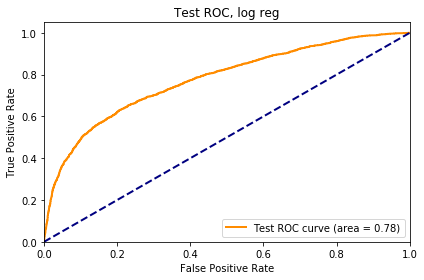

In [240]:
y_score = rnforest.predict_proba(X_new_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

fig = plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
       lw=lw, label='Test ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC, log reg')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [241]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[6041  971]
 [ 891 1097]]
Normalized confusion matrix
[[0.86 0.14]
 [0.45 0.55]]


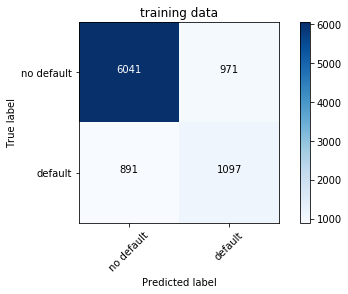

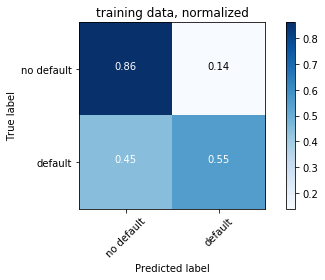

In [242]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,  rnforest.predict(X_new_test))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
f1 = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['no default', 'default'],
                      title='training data')

# Plot normalized confusion matrix
f2 = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['no default', 'default'], normalize=True,
                      title='training data, normalized')


plt.tight_layout()
plt.show()


In [243]:
def model_predict(model, feats, threshold=0.5):
    probs = model.predict_proba(feats)
    y_hat = [1 if x[1] >= threshold else 0 for x in probs]
    return y_hat


In [244]:
accuracy = []
precision = []

In [245]:
for i in np.linspace(0,1,21):
    y_hat = model_predict(rnforest, X_new_test, threshold=i)
    accuracy.append(accuracy_score(y_test, y_hat))
    cnf_matrix = confusion_matrix(y_test,  y_hat)
    precision.append(cnf_matrix[1][1]/np.sum(cnf_matrix[1]))

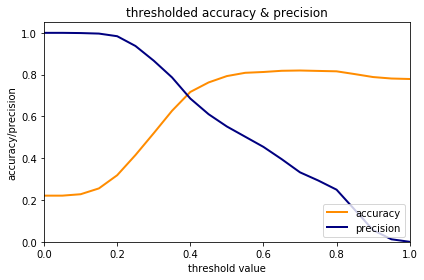

In [246]:
fig = plt.figure()
lw = 2
xrange = np.linspace(0,1,21)
plt.plot(xrange, accuracy, color='darkorange',
       lw=lw, label='accuracy')
plt.plot(xrange, precision, color='navy',
       lw=lw, label='precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('threshold value')
plt.ylabel('accuracy/precision')
plt.title('thresholded accuracy & precision')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

Confusion matrix, without normalization
[[4914 2098]
 [ 594 1394]]
Normalized confusion matrix
[[0.7 0.3]
 [0.3 0.7]]


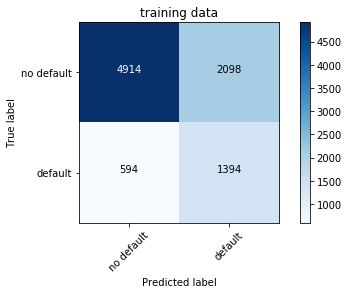

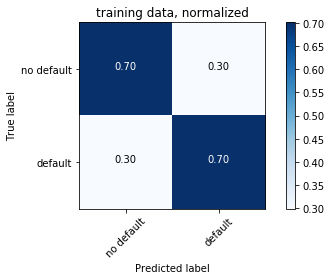

In [247]:
# Compute confusion matrix
y_hat = model_predict(rnforest, X_new_test, threshold=0.39)

cnf_matrix = confusion_matrix(y_test,  y_hat)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
f1 = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['no default', 'default'],
                      title='training data')

# Plot normalized confusion matrix
f2 = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['no default', 'default'], normalize=True,
                      title='training data, normalized')


plt.tight_layout()
plt.show()


In [248]:
accuracy_score(y_test, y_hat)

0.7008888888888889